In [2]:
import pandas_datareader as pdr

In [3]:
key = "de388660817c9d4dfb5711fa4443778180cefa64"

In [4]:
df = pdr.get_data_tiingo('GOOGL', api_key = key)

C:\Users\Akhilesh Kumar\AppData\Local\Temp\ipykernel_748\1403540965.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('GOOGL', api_key = key)


In [5]:
df.to_csv('GOOGL.csv')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('GOOGL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2019-06-10 00:00:00+00:00,1082.76,1094.84,1075.28,1077.00,1425464,54.1380,54.7420,53.7640,53.8500,28509280,0.0,1.0
1,GOOGL,2019-06-11 00:00:00+00:00,1081.04,1104.01,1079.57,1096.99,1675817,54.0520,55.2005,53.9785,54.8495,33516340,0.0,1.0
2,GOOGL,2019-06-12 00:00:00+00:00,1079.10,1082.52,1069.60,1079.95,1183650,53.9550,54.1260,53.4800,53.9975,23673000,0.0,1.0
3,GOOGL,2019-06-13 00:00:00+00:00,1091.01,1096.59,1082.57,1084.71,1040661,54.5505,54.8295,54.1285,54.2355,20813220,0.0,1.0
4,GOOGL,2019-06-14 00:00:00+00:00,1086.30,1094.76,1081.48,1089.74,1229304,54.3150,54.7380,54.0740,54.4870,24586080,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOGL,2024-05-31 00:00:00+00:00,172.50,173.060,169.4400,171.860,37638876,172.50,173.060,169.4400,171.860,37638876,0.0,1.0
1254,GOOGL,2024-06-03 00:00:00+00:00,173.17,174.525,171.1600,172.540,27459118,173.17,174.525,171.1600,172.540,27459118,0.0,1.0
1255,GOOGL,2024-06-04 00:00:00+00:00,173.79,173.845,171.8900,173.280,26879596,173.79,173.845,171.8900,173.280,26879596,0.0,1.0
1256,GOOGL,2024-06-05 00:00:00+00:00,175.41,176.645,173.9339,175.200,22068519,175.41,176.645,173.9339,175.200,22068519,0.0,1.0
1257,GOOGL,2024-06-06 00:00:00+00:00,176.73,177.150,175.7500,175.895,20125850,176.73,177.150,175.7500,175.895,20125850,0.0,1.0


In [10]:
df1 = df.reset_index()['close']

In [11]:
df1

0       1082.76
1       1081.04
2       1079.10
3       1091.01
4       1086.30
         ...   
1253     172.50
1254     173.17
1255     173.79
1256     175.41
1257     176.73
Name: close, Length: 1258, dtype: float64

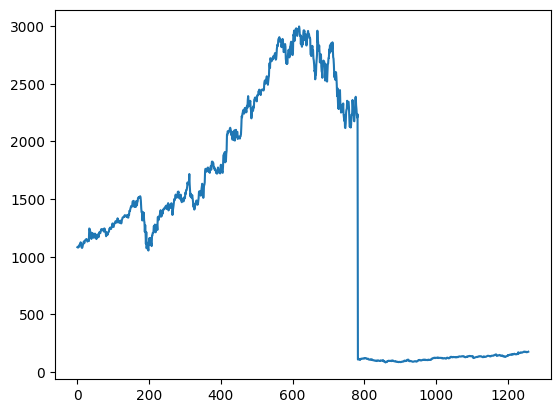

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
## LSTM are senstive to the scale of the data. So we apply here MinMax scale treansforming the value betweem 0 to 1

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [15]:
df1.shape

(1258, 1)

In [16]:
df1

array([[0.34301867],
       [0.34242828],
       [0.34176238],
       ...,
       [0.03101595],
       [0.03157201],
       [0.0320251 ]])

In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size, test_size

(880, 378)

In [19]:
# saperating the features and target data

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [20]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(Y_train.shape)

(779, 100)
(779,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\Akhilesh Kumar\Anakonda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 348ms/step - loss: 0.1758 - val_loss: 0.0059
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - loss: 0.0260 - val_loss: 0.0104
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.0129 - val_loss: 0.0025
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - loss: 0.0070 - val_loss: 6.0143e-06
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.0074 - val_loss: 4.7768e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - loss: 0.0079 - val_loss: 4.7665e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - loss: 0.0094 - val_loss: 1.0750e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - loss: 0.0066 - val_loss: 3.0537e-05
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - loss: 0.0056 - val_loss: 4.4168e-06
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.0065 - val_loss: 4.0548e-06
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - loss: 0.0050 - val_loss: 3.9151e-05
Epoch 12

In [27]:
import tensorflow as tf

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

2017.928913167365

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

144.26560602768393

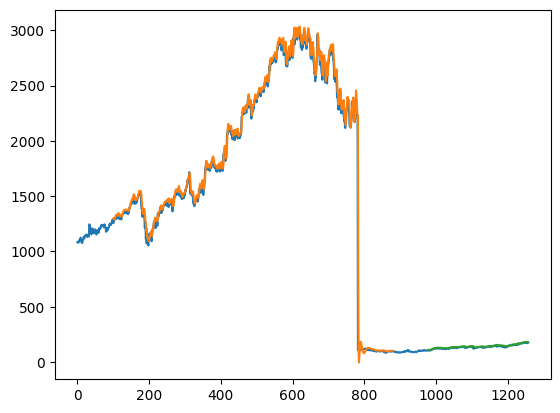

In [32]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

378

In [38]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.020272264823192623,
 0.019922151207891967,
 0.020612080979219724,
 0.02160750204232942,
 0.021473635071773294,
 0.021834046146347486,
 0.02240383889281717,
 0.023491937089388813,
 0.02360006041176107,
 0.024054864863009458,
 0.02335120514598365,
 0.01945190056773325,
 0.019815744128731966,
 0.020234507472522943,
 0.02068073070771005,
 0.020824895137539726,
 0.021319173182670056,
 0.021446175180377156,
 0.02250681348555266,
 0.02200223798114878,
 0.021181873725689408,
 0.021456472639650705,
 0.020368374443079075,
 0.01959606499756294,
 0.019802014183033907,
 0.02029285974173972,
 0.020821462651115216,
 0.020776840327596503,
 0.018583481502330655,
 0.019033137223942273,
 0.018175015617813227,
 0.0188889727941126,
 0.018435884586076458,
 0.01713497223118482,
 0.01690156315431772,
 0.016465637378404167,
 0.017488518332909986,
 0.01784206443463516,
 0.018617806366575812,
 0.018902702739810665,
 0.01934549348857325,
 0.02048164649508811,
 0.019822609101581005,
 0.022053725277516527,
 0.02

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=1
while(i<31):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

1 day input [0.01888897 0.01843588 0.01713497 0.01690156 0.01646564 0.01748852
 0.01784206 0.01861781 0.0189027  0.01934549 0.02048165 0.01982261
 0.02205373 0.02183061 0.02241757 0.02202627 0.02311436 0.02287409
 0.02308004 0.02314869 0.02316928 0.0247345  0.02441528 0.02453885
 0.02303198 0.02370818 0.02451482 0.0251155  0.02495761 0.02608003
 0.02550337 0.02451825 0.02436036 0.02472763 0.02491299 0.02425395
 0.02500566 0.0256853  0.02598392 0.02490955 0.03038437 0.02839353
 0.02723678 0.02760749 0.02855485 0.02876767 0.02906286 0.0301441
 0.02950222 0.02970131 0.02925165 0.02941984 0.02983174 0.03057659
 0.03114981 0.03179512 0.03209032 0.03240954 0.03190496 0.03093357
 0.03142785 0.03191183 0.0317402  0.03043929 0.03057316 0.03080313
 0.03101595 0.03157201 0.0320251  0.0336187  0.03388173 0.03429643
 0.03480018 0.03534694 0.03591068 0.03647958 0.03704975 0.03762096
 0.03819419 0.03877059 0.03935106 0.03993613 0.04052607 0.04112094
 0.04172067 0.04232507 0.04293392 0.04354699 0.0441

9 day output [[0.05725865]]
10 day input [0.01934549 0.02048165 0.01982261 0.02205373 0.02183061 0.02241757
 0.02202627 0.02311436 0.02287409 0.02308004 0.02314869 0.02316928
 0.0247345  0.02441528 0.02453885 0.02303198 0.02370818 0.02451482
 0.0251155  0.02495761 0.02608003 0.02550337 0.02451825 0.02436036
 0.02472763 0.02491299 0.02425395 0.02500566 0.0256853  0.02598392
 0.02490955 0.03038437 0.02839353 0.02723678 0.02760749 0.02855485
 0.02876767 0.02906286 0.0301441  0.02950222 0.02970131 0.02925165
 0.02941984 0.02983174 0.03057659 0.03114981 0.03179512 0.03209032
 0.03240954 0.03190496 0.03093357 0.03142785 0.03191183 0.0317402
 0.03043929 0.03057316 0.03080313 0.03101595 0.03157201 0.0320251
 0.0336187  0.03388173 0.03429643 0.03480018 0.03534694 0.03591068
 0.03647958 0.03704975 0.03762096 0.03819419 0.03877059 0.03935106
 0.03993613 0.04052607 0.04112094 0.04172067 0.04232507 0.04293392
 0.04354699 0.04416406 0.04478493 0.04540941 0.04603739 0.04666879
 0.04730354 0.04794162 

18 day output [[0.06369119]]
19 day input [0.02308004 0.02314869 0.02316928 0.0247345  0.02441528 0.02453885
 0.02303198 0.02370818 0.02451482 0.0251155  0.02495761 0.02608003
 0.02550337 0.02451825 0.02436036 0.02472763 0.02491299 0.02425395
 0.02500566 0.0256853  0.02598392 0.02490955 0.03038437 0.02839353
 0.02723678 0.02760749 0.02855485 0.02876767 0.02906286 0.0301441
 0.02950222 0.02970131 0.02925165 0.02941984 0.02983174 0.03057659
 0.03114981 0.03179512 0.03209032 0.03240954 0.03190496 0.03093357
 0.03142785 0.03191183 0.0317402  0.03043929 0.03057316 0.03080313
 0.03101595 0.03157201 0.0320251  0.0336187  0.03388173 0.03429643
 0.03480018 0.03534694 0.03591068 0.03647958 0.03704975 0.03762096
 0.03819419 0.03877059 0.03935106 0.03993613 0.04052607 0.04112094
 0.04172067 0.04232507 0.04293392 0.04354699 0.04416406 0.04478493
 0.04540941 0.04603739 0.04666879 0.04730354 0.04794162 0.04858307
 0.04922791 0.04987622 0.05052805 0.05118347 0.05184257 0.05250547
 0.05317222 0.0538429

27 day output [[0.0705312]]
28 day input [0.0251155  0.02495761 0.02608003 0.02550337 0.02451825 0.02436036
 0.02472763 0.02491299 0.02425395 0.02500566 0.0256853  0.02598392
 0.02490955 0.03038437 0.02839353 0.02723678 0.02760749 0.02855485
 0.02876767 0.02906286 0.0301441  0.02950222 0.02970131 0.02925165
 0.02941984 0.02983174 0.03057659 0.03114981 0.03179512 0.03209032
 0.03240954 0.03190496 0.03093357 0.03142785 0.03191183 0.0317402
 0.03043929 0.03057316 0.03080313 0.03101595 0.03157201 0.0320251
 0.0336187  0.03388173 0.03429643 0.03480018 0.03534694 0.03591068
 0.03647958 0.03704975 0.03762096 0.03819419 0.03877059 0.03935106
 0.03993613 0.04052607 0.04112094 0.04172067 0.04232507 0.04293392
 0.04354699 0.04416406 0.04478493 0.04540941 0.04603739 0.04666879
 0.04730354 0.04794162 0.04858307 0.04922791 0.04987622 0.05052805
 0.05118347 0.05184257 0.05250547 0.05317222 0.05384295 0.05451769
 0.05519655 0.05587961 0.05656696 0.05725865 0.05795477 0.05865537
 0.05936056 0.06007035 

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
import matplotlib.pyplot as plt
len(df1)

1258

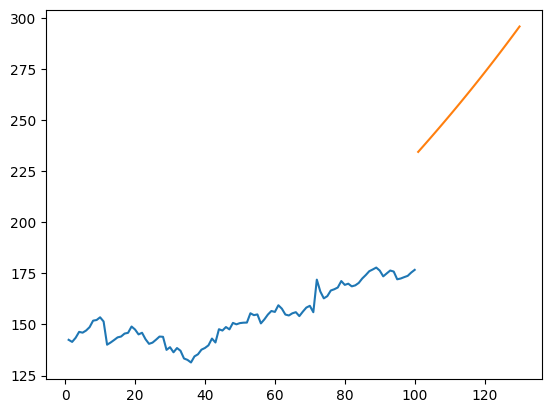

In [45]:
# ploting the next 30 days predictions
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

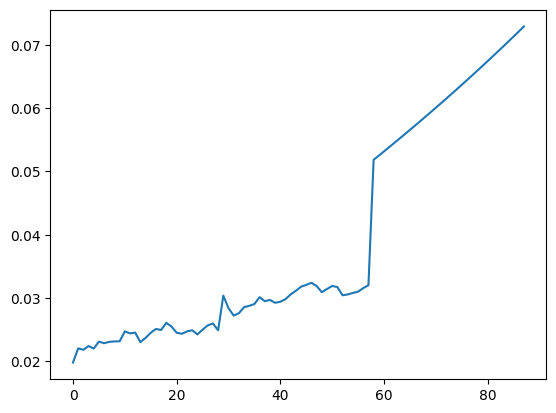

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

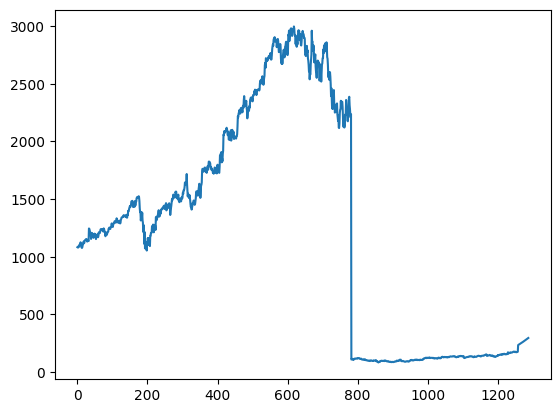

In [47]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [13]:
# Split the data into training and test set
train_size = int(len(df1) * 0.8)
train_data, test = df1[0:train_size], df1[train_size:]

In [15]:
# Fit the ARIMA model
#model = ARIMA(train, order=(5, 1, 0))  
#model_fit = model.fit()
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

NameError: name 'auto_arima' is not defined

In [69]:
# Forecast the next 30 days
forecast_result = model_fit.get_forecast(steps=30)
forecast = forecast_result.predicted_mean
stderr = forecast_result.se_mean
conf_int = forecast_result.conf_int()

In [70]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1, label='Historical')
plt.plot(pd.date_range(start=data.index[-1], periods=31, closed='right'), forecast, label='Forecast', color='red')
plt.fill_between(pd.df1_range(start=df1.index[-1], periods=31, closed='right'),
                 conf_int[:, 0], conf_int[:, 1], color='pink')
plt.legend()
plt.show()

# Print the forecast
print(forecast)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

<Figure size 1200x600 with 0 Axes>